In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
df=pd.read_csv('blackFriday_train.csv')

In [41]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [42]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [43]:
df.isnull().sum()/len(df) * 100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [44]:
plot = ['Product_Category_2','Product_Category_3']
for i in plot:
    df[i].fillna(df[i].median(), inplace = True)


In [45]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.9+ MB


In [47]:
#df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':5,'55+':6})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,14.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,14.0,7969


In [48]:
np.shape(df)

(550068, 12)

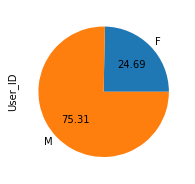

In [49]:
df.groupby('Gender')['User_ID'].count().plot.pie(autopct = '%.2f', figsize= (6,3))

Male Purchase More Than Female

In [50]:
df.isnull().sum()/len(df)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
Purchase                      0.0
dtype: float64

## We Get Rid Of All The Missing Value

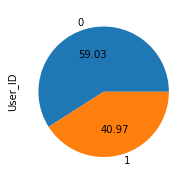

In [51]:
df.groupby('Marital_Status')['User_ID'].count().plot.pie(autopct = '%.2f', figsize= (6,3))

## Most Purchase Is Done By Bachelors Than Married

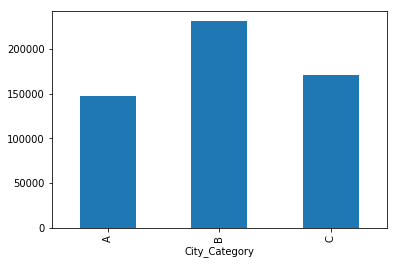

In [52]:
df.groupby('City_Category')['User_ID'].count().plot(kind='bar')

## Most Purchase Is Done By B City

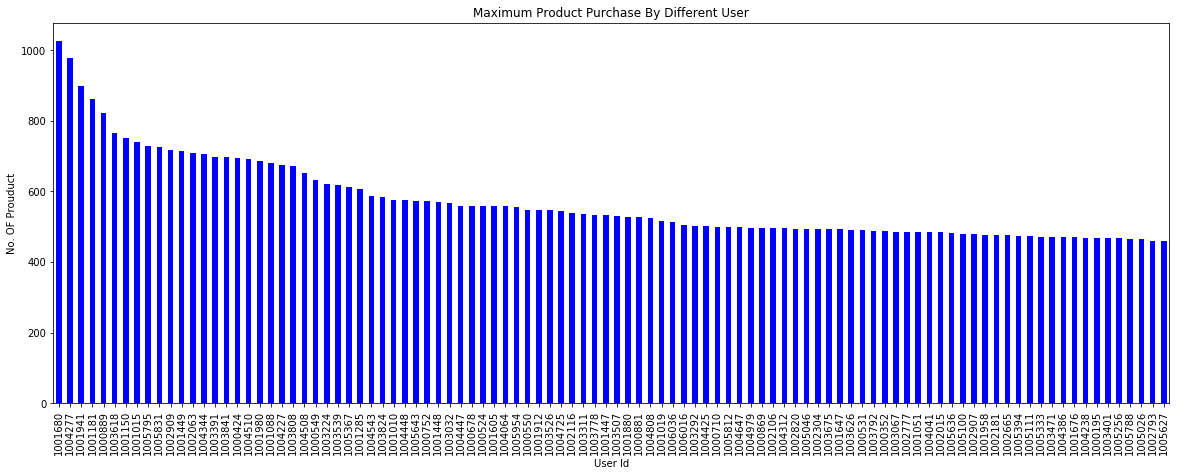

In [56]:
df.groupby('User_ID')['Product_ID'].count().sort_values(ascending=False).head(100).plot.bar(color = 'Blue', figsize = (20, 7))
plt.title('Maximum Product Purchase By Different User')
plt.xlabel('User Id')
plt.ylabel('No. OF Prouduct')
plt.show()

## Id 1001680 Buy  Most Type Of Product

In [54]:
list(df['Occupation'].sort_values().unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

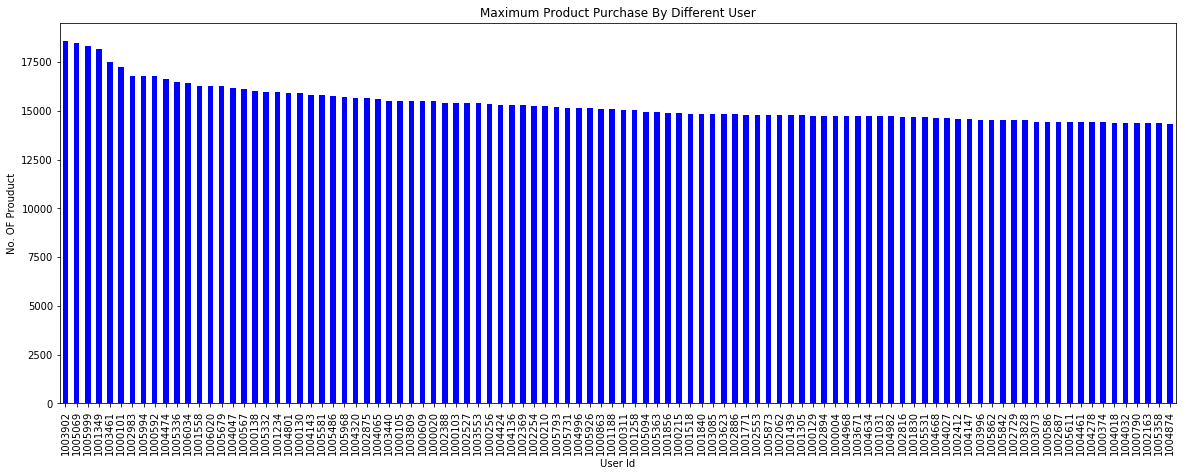

In [60]:
df.groupby('User_ID')['Purchase'].mean().sort_values(ascending=False).head(100).plot.bar(color = 'Blue', figsize = (20, 7))
plt.title('Maximum Product Purchase By Different User')
plt.xlabel('User Id')
plt.ylabel('No. OF Prouduct')
plt.show()

## Id 1003902 Puchase Most

In [63]:
list(df['Occupation'].sort_values().unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [66]:
df.groupby('Occupation')['Purchase'].sum().plot(kind='bar')

Occupation
0     635406958
1     424614144
2     238028583
3     162002168
4     666244484
5     113649759
6     188416784
7     557371587
8      14737388
9      54340046
10    115844465
11    106751618
12    305449446
13     71919481
14    259454692
15    118960211
16    238346955
17    393281453
18     60721461
19     73700617
20    296570442
Name: Purchase, dtype: int64

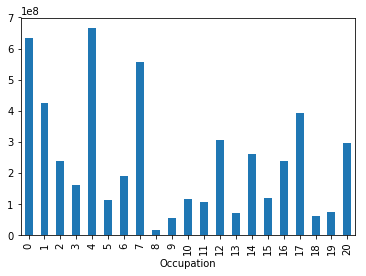

In [79]:
df.groupby('Occupation')['Purchase'].sum()

## People Who Are Doing Occupation 4 Have Done Maximum Purchase